<a href="https://colab.research.google.com/github/princeiiitk/Placement_Perdition/blob/main/Project_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

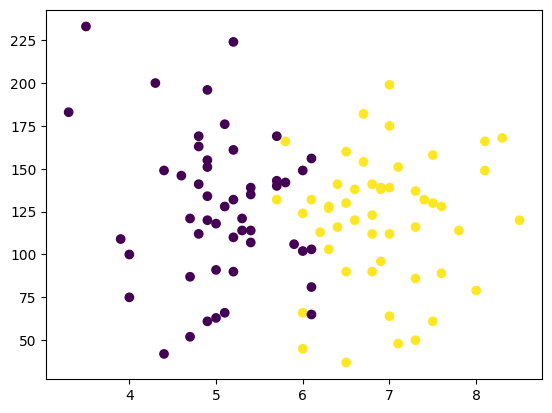

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
9,5.1,66.0
32,7.0,139.0
8,6.1,156.0
57,6.5,130.0
54,6.4,141.0
...,...,...
28,5.2,90.0
39,4.6,146.0
4,5.8,142.0
69,8.5,120.0


In [ ]:
y_train

,placement
9,0
32,1
8,0
57,1
54,1
...,...
28,0
39,0
4,0
69,1


In [ ]:
X_test

,cgpa,iq
33,6.0,149.0
53,8.3,168.0
43,6.8,141.0
12,5.4,139.0
70,6.3,127.0
5,7.1,48.0
7,5.0,63.0
16,5.2,224.0
47,5.2,161.0
85,5.8,166.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.76165322, -1.46065465],
       [ 0.88698856,  0.44644015],
       [ 0.10605298,  0.89055812],
       [ 0.45313546,  0.21131888],
       [ 0.36636484,  0.49868933],
       [-1.02196508, -0.25892368],
       [-1.80290067, -0.33729744],
       [ 1.84146539,  1.15180398],
       [ 1.84146539,  0.70768602],
       [-1.02196508,  1.07343023],
       [-0.93519446,  0.31581722],
       [ 0.36636484, -0.15442533],
       [ 0.71344732,  0.02844677],
       [-0.93519446,  0.75993519],
       [ 0.10605298, -1.06878585],
       [-0.84842384, -0.10217616],
       [ 0.10605298,  0.26356805],
       [ 0.45313546, -2.21826765],
       [-0.93519446, -0.04992699],
       [ 1.14730043,  0.39419098],
       [ 1.32084167, -1.59127758],
       [ 1.14730043, -1.87864803],
       [ 0.53990608, -0.04992699],
       [-2.32352439,  1.59592195],
       [ 0.01928236, -1.46065465],
       [ 0.80021794,  0.44644015],
       [-0.2410295 ,  1.23017774],
       [-0.76165322,  0.1590697 ],
       [-0.2410295 ,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.01928236,  0.70768602],
       [ 2.01500663,  1.20405316],
       [ 0.71344732,  0.49868933],
       [-0.50134136,  0.44644015],
       [ 0.27959422,  0.13294512],
       [ 0.97375918, -1.9308972 ],
       [-0.84842384, -1.53902841],
       [-0.6748826 ,  2.66702999],
       [-0.6748826 ,  1.02118105],
       [-0.15425888,  1.15180398]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

,placement
33,0
53,1
43,1
12,0
70,1
5,1
7,0
16,0
47,0
85,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

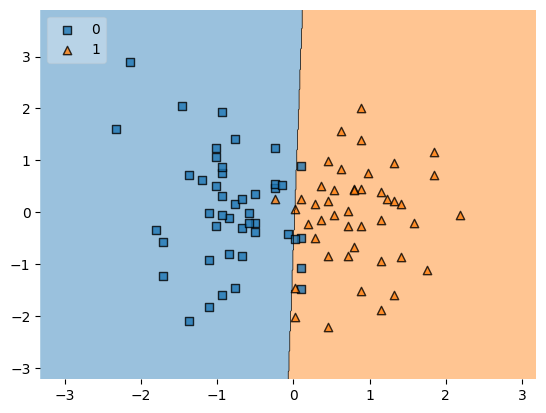

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)